Implementation of Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df= sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Size of dataset

In [7]:
df.shape

(150, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
df.duplicated().sum()

1

In [16]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

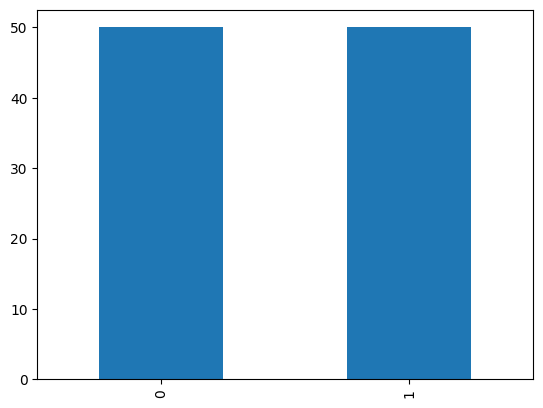

In [33]:
df['species'].value_counts().plot(kind='bar')

In [19]:
df= df[df['species']!= 'setosa']

In [21]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,versicolor
143,6.8,3.2,5.9,2.3,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
114,5.8,2.8,5.1,2.4,virginica
65,6.7,3.1,4.4,1.4,versicolor
63,6.1,2.9,4.7,1.4,versicolor
141,6.9,3.1,5.1,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
74,6.4,2.9,4.3,1.3,versicolor


In [22]:
df['species'].unique()

array(['versicolor', 'virginica'], dtype=object)

In [23]:
mapping= {'versicolor' : 0 , 'virginica' : 1 }

df['species'] = df['species'].map(mapping)

<ipython-input-23-e7f5a2b3da59>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = df['species'].map(mapping)


In [26]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
73,6.1,2.8,4.7,1.2,0
59,5.2,2.7,3.9,1.4,0
89,5.5,2.5,4.0,1.3,0
104,6.5,3.0,5.8,2.2,1
113,5.7,2.5,5.0,2.0,1


In [28]:
#splitting dataset into dependent and independent variable

X= df.iloc[:,:-1] #only independent variables i.e 4 cols
Y= df.iloc[:,-1]  #only independent variables i.e 1 cols

In [29]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
Y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.25, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression()

classifier.fit(X_train,  y_train )

LogisticRegression()

In [41]:
model_predict= classifier.predict(X_test)

In [42]:
classifier.score(X_test, y_test)

0.92

In [46]:
from sklearn.metrics import accuracy_score, classification_report

score= accuracy_score(model_predict, y_test)

print(score)

0.92


In [47]:
report= classification_report(model_predict, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




# Define your logistic regression model and parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization term
    'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50]  # Inverse of regularization strength
}

logreg_model = LogisticRegression()

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best logistic regression model
best_params = grid_search.best_params_
best_logreg_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Test Set Accuracy:", accuracy)


Best Parameters: {'C': 1, 'penalty': 'l2'}
Test Set Accuracy: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 165.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

In [50]:
param_grid = {
    'penalty': ['l2'],  # Only 'l2' is compatible with 'lbfgs'
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

logreg_model = LogisticRegression(solver='lbfgs')  # Specify the solver

grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_logreg_model = grid_search.best_estimator_

accuracy = best_logreg_model.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Test Set Accuracy:", accuracy)


Best Parameters: {'C': 1, 'penalty': 'l2'}
Test Set Accuracy: 0.92
